In [1]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
realdf = pd.read_csv('Real estate valuation data set.csv')
realdf.keys()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [4]:
X = realdf.copy()
y = realdf['Y house price of unit area']
del X['Y house price of unit area']

In [5]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
error_train = []
lim = 200
for k in range(1,lim+1):
    neighb = KNeighborsRegressor(n_neighbors = k)
    neighb.fit(train_X, train_Y)
    tr_e = np.sqrt( np.sum( train_Y - neighb.predict(train_X)) ** 2 )
    error_train.append(tr_e)


Text(0.5, 1.0, 'Train Error')

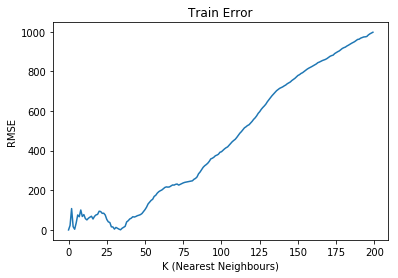

In [27]:
plt.plot(list(range(lim)), error_train)
plt.xlabel('K (Nearest Neighbours)')
plt.ylabel('RMSE')
plt.title('Train Error')

In [8]:
error_test = []
ll = 3
ul = 25
for k in range(ll,ul+1):
    neighb = KNeighborsRegressor(n_neighbors = k)
    neighb.fit(train_X, train_Y)
    ts_e = np.sqrt( np.sum( test_Y - neighb.predict(test_X)) ** 2 )
    error_test.append(ts_e)

Text(0.5, 1.0, 'Test Error')

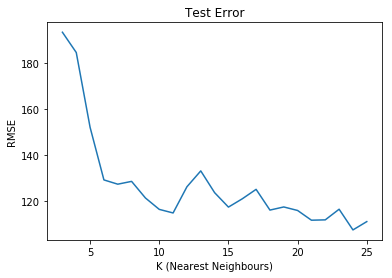

In [28]:
plt.plot(list(range(ll,ul+1)), error_test)
plt.xlabel('K (Nearest Neighbours)')
plt.ylabel('RMSE')
plt.title('Test Error')

In [10]:
error_test2 = []
ll2 = 3
ul2 = 200
for k in range(ll2,ul2+1):
    neighb = KNeighborsRegressor(n_neighbors = k)
    neighb.fit(train_X, train_Y)
    ts_e = np.sqrt( np.sum( test_Y - neighb.predict(test_X)) ** 2 )
    error_test2.append(ts_e)

Text(0.5, 1.0, 'Test Error')

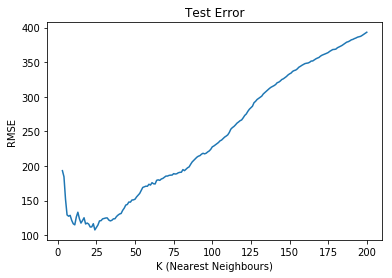

In [29]:
plt.plot(list(range(ll2,ul2+1)), error_test2)

plt.xlabel('K (Nearest Neighbours)')
plt.ylabel('RMSE')
plt.title('Test Error')

We see that train error increases with K. This is because, when K is low, there is a lot of overfitting the train data.

However, test error decreases when K is increased. However, if K is increased too much (sometimes when it is increased to a number comparable to the number of training samples) then, it increses again.
Test error decreases initially, reaches a minimum and then, inccreases again. When K is low, there is overfitting of the train data. When K is to high, the model is very generalised and there is underfitting of the train data.

K ~ 25 is approxomately the optimal K for this dataset.

# 2.c)i)

In [12]:
K = 25
neighb = KNeighborsRegressor(n_neighbors = K)
neighb.fit(train_X, train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=25, p=2,
          weights='uniform')

In [13]:
predictions = neighb.predict(test_X)

In [17]:
errors = list(test_Y - predictions)


In [39]:
rmse = np.sqrt(np.mean(np.array(errors) ** 2))
print(rmse)

7.24804066586


In [18]:
max_error = max(errors)
max_error_index = errors.index(max_error)

In [41]:
print('Max RMSE home:', '\n')
print(max_error_index,'\n')
print(test_X.iloc[max_error_index],' \n')
print('House price:',test_Y.iloc[max_error_index], '\n')
print('Prediction:',predictions[max_error_index])
print('RMSE:', max_error)
print('Percentage Error:', max_error/test_Y.iloc[max_error_index])
print('Overall RMSE:',rmse)

Max RMSE home: 

14 

No                                         127.00000
X1 transaction date                       2013.08300
X2 house age                                38.60000
X3 distance to the nearest MRT station     804.68970
X4 number of convenience stores              4.00000
X5 latitude                                 24.97838
X6 longitude                               121.53477
Name: 126, dtype: float64  

House price: 62.9 

Prediction: 36.996
RMSE: 25.903999999999996
Percentage Error: 0.411828298887
Overall RMSE: 7.24804066586


Here, we see that the highest error is for the above shown house and the error is 41%. This is poor because it is the maximum error out of all. Thus, although this is high, the overall RMSE is only ~ 7.2. This is because there are many houses for which the price prediction error is very low ( less than 7.2).

This can be improved if optimal K is taken (note that K = 25 is close to the optimal value of K, from the graphs). This can also be reduced of the input data is normalised.